In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing User Product Purchase Details Dataset

df1 = pd.read_csv(r"C:\Users\apoojha\Desktop\Capstone\Capstone Project2_ Retail\Retail_datasets_P2\User_product_purchase_details_p2.csv")
df1

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365


In [4]:
#Importing User Demographics Dataset
df2 = pd.read_csv(r"C:\Users\apoojha\Desktop\Capstone\Capstone Project2_ Retail\Retail_datasets_P2\user_demographics.csv")
df2

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16
2,1000003,M,26-35,15
3,1000004,M,46-50,7
4,1000005,M,26-35,20
...,...,...,...,...
5886,1004588,F,26-35,4
5887,1004871,M,18-25,12
5888,1004113,M,36-45,17
5889,1005391,M,26-35,7


In [5]:
#merging both the DATAFRAMES
df3 = df2.merge(df1,how = 'inner' , on = 'User_ID')
df3

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000001,F,0-17,10,P00085942,A,2,0,2,4.0,8.0,12842
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1001529,M,18-25,4,P00053942,C,4+,1,1,2.0,5.0,15185
550064,1001529,M,18-25,4,P00182742,C,4+,1,1,2.0,14.0,11975
550065,1001529,M,18-25,4,P00242742,C,4+,1,1,2.0,9.0,11893
550066,1001529,M,18-25,4,P00063342,C,4+,1,1,2.0,9.0,11641


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   Product_ID                  550068 non-null  object 
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


In [7]:
df3.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Filling Null Values in ProductCategory2  and ProductCategory3 with 0.

## 1. Univariate, Bi- Variate Analysis and Multi- Variate Analysis 

### Univariate Analysis

The columns Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3

GENDER

In [8]:
count_gender= df2['Gender'].value_counts()
count_gender


M    4225
F    1666
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

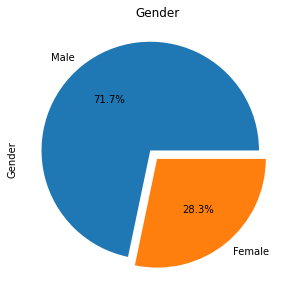

In [9]:
plt.figure(figsize = (7,5))

count_gender.plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%")

AGE

In [10]:
df2['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

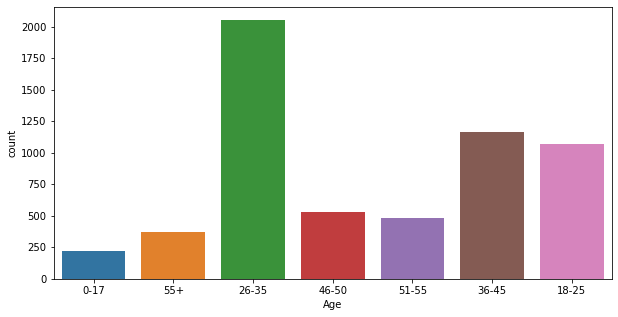

In [11]:
plt.figure(figsize = (10,5))

sns.countplot(x = df2['Age'], data= df2)

#### OBSERVATION:

The main customers for Black Friday Sale are in "26-35" Age Group.

C:\Users\apoojha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age and Gender')

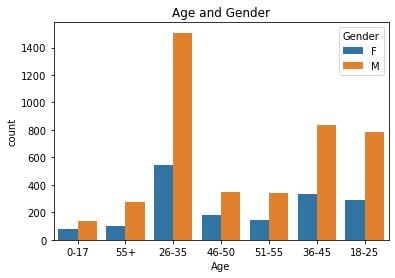

In [12]:
#Age and Gender

sns.countplot(df2["Age"], hue=df2["Gender"]).set_title("Age and Gender")

#### OBSERVATION:

Male Customers who are in the Age group '26-35' are the major customers of the Black Friday sales. 


Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. 

To increase profits for the Black Friday Sale, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

OCCUPATION

In [13]:
df2['Occupation'].value_counts()

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
13    140
15    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

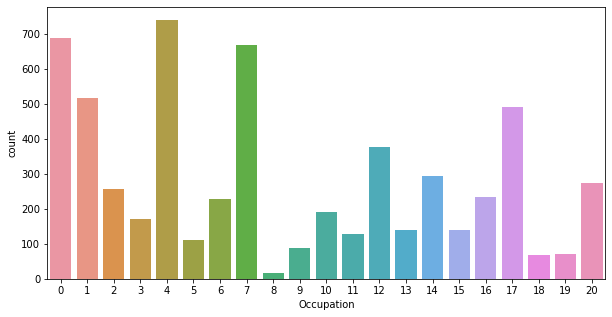

In [14]:
plt.figure(figsize = (10,5))

sns.countplot(x = df2['Occupation'], data= df3)

CITY_CATEGORY

In [15]:
Count_City= df3['City_Category'].value_counts()
Count_City

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:title={'center':'City_Category'}, ylabel='City_Category'>

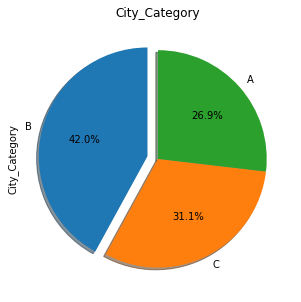

In [16]:
plt.figure(figsize = (10,5))

Count_City.plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

STAY_IN_CITY_CURRENT_YEARS

In [17]:
df3['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Stay_In_Current_City_Years'>

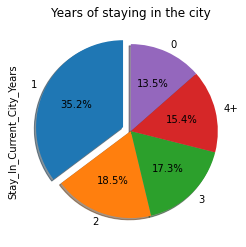

In [18]:
df3["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city", startangle=90,
                                                explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

MARITAL STATUS

In [19]:
Count_Marital_Status = df3.groupby(['Marital_Status'],  as_index=False)['User_ID'].nunique()
Count_Marital_Status.drop('Marital_Status',axis=1, inplace=True)
Count_Marital_Status.rename(columns = {'User_ID':'Marital_Status'}, inplace = True)

Count_Marital_Status

,Marital_Status
0,3417
1,2474


<AxesSubplot:title={'center':'Marital_Status'}, ylabel='Marital_Status'>

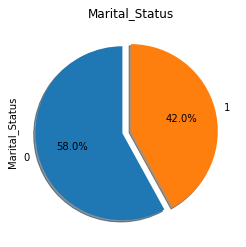

In [20]:
Count_Marital_Status['Marital_Status'].plot.pie(title="Marital_Status", labels=[0,1],startangle=90, explode=(0.1, 0), autopct="%1.1f%%", shadow=True)

PRODUCT_CATEGORY_1

In [21]:
df3['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

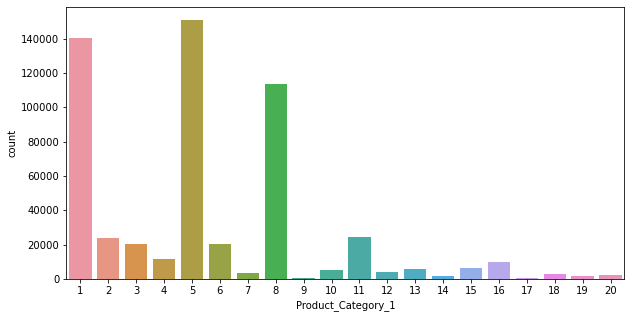

In [22]:
plt.figure(figsize = (10,5))

sns.countplot(x = df3['Product_Category_1'], data= df3)

PRODUCT_CATEGORY_2

In [23]:
df3['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

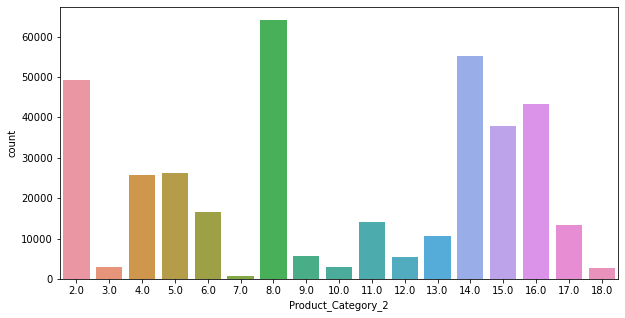

In [24]:
plt.figure(figsize = (10,5))

sns.countplot(x = df3['Product_Category_2'], data= df3)

PRODUCT_CATEGORY_3

In [25]:
df3['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

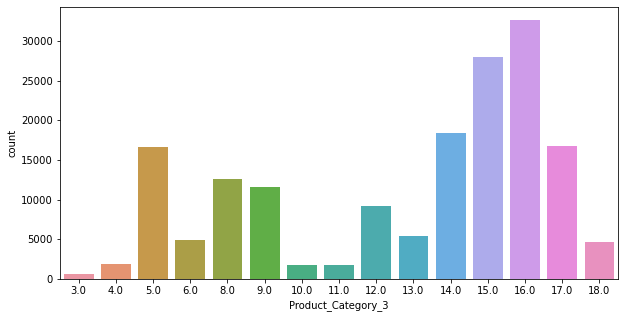

In [26]:
plt.figure(figsize = (10,5))

sns.countplot(x = df3['Product_Category_3'], data= df3)

## Bi- Variate Analysis

### OCCUPATION and PURCHASE

In [27]:
Occupation_group = df3.groupby("Occupation")["Purchase"].sum()
Occupation_group = pd.DataFrame(Occupation_group)

Occupation_group

,Purchase
Occupation,
0,635406958
1,424614144
2,238028583
3,162002168
4,666244484
5,113649759
6,188416784
7,557371587
8,14737388


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

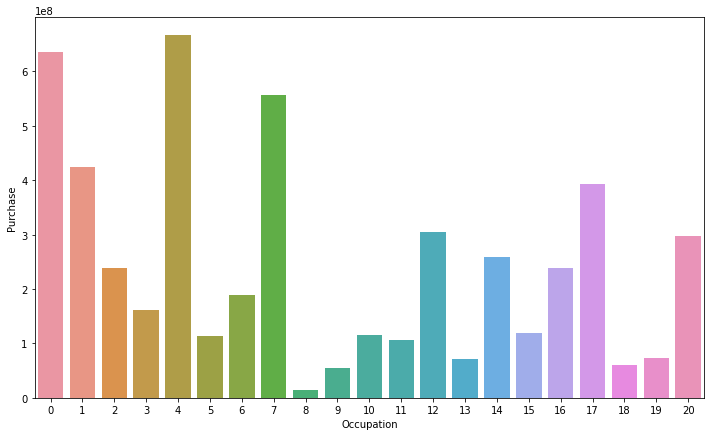

In [28]:
plt.figure(figsize = (12,7))
sns.barplot(x= Occupation_group.index,y=Occupation_group['Purchase'],data= df3)


### GENDER and PURCHASE

In [29]:
Gender_group = df3.groupby("Gender")["Purchase"].sum()
#Gender_group = pd.DataFrame(Gender_group)

Gender_group

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

<AxesSubplot:title={'center':'Gender'}, ylabel='Purchase'>

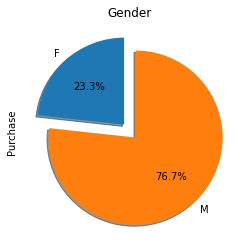

In [30]:
Gender_group.plot.pie(title="Gender", startangle=90, explode=(0.1, 0.1), autopct="%1.1f%%", shadow=True)

### AGE and PURCHASE

In [31]:
Age_group = df3.groupby("Age")["Purchase"].sum()
Age_group = pd.DataFrame(Age_group)

Age_group

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

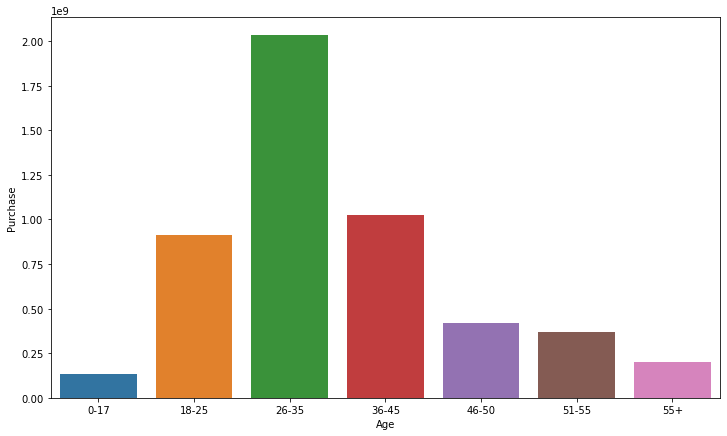

In [32]:
plt.figure(figsize = (12,7))
sns.barplot(x= Age_group.index,y=Age_group['Purchase'],data= df3)


### MARITAL STATUS and PURCHASE

In [33]:
Marital_Status_group = df3.groupby("Marital_Status")["Purchase"].sum()
Marital_Status_group = pd.DataFrame(Marital_Status_group)

Marital_Status_group


,Purchase
Marital_Status,
0,3008927447
1,2086885295


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

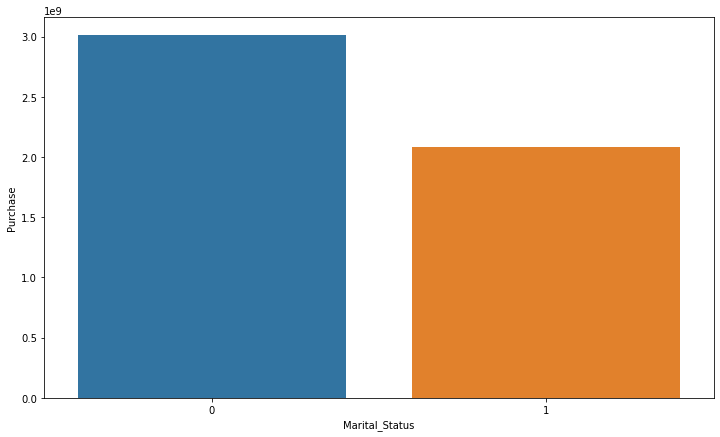

In [34]:
plt.figure(figsize = (12,7))
sns.barplot(x= Marital_Status_group.index,y=Marital_Status_group['Purchase'],data= df3)


### CITY_CATEGORY and PURCHASE 

In [35]:
City_Category_group = df3.groupby("City_Category")["Purchase"].sum()
City_Category_group = pd.DataFrame(City_Category_group)

City_Category_group

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

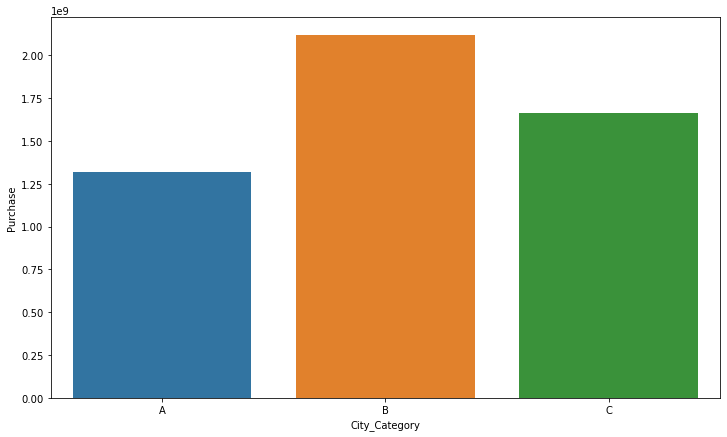

In [36]:
plt.figure(figsize = (12,7))
sns.barplot(x= City_Category_group.index,y=City_Category_group['Purchase'], data= df3)


### PRODUCT_CATEGORY_1 and PURCHASE

In [38]:
Product_Category1_group = df3.groupby("Product_Category_1")["Purchase"].sum()
Product_Category1_group = pd.DataFrame(Product_Category1_group)

Product_Category1_group

,Purchase
Product_Category_1,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

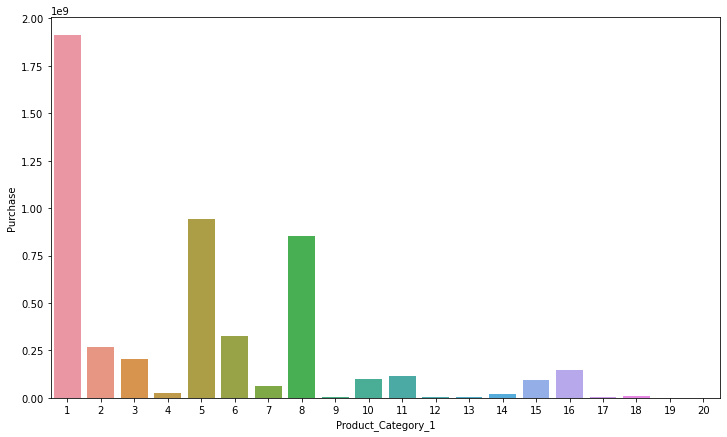

In [39]:
plt.figure(figsize = (12,7))
sns.barplot(x= Product_Category1_group.index,y=Product_Category1_group['Purchase'], data= df3)


### PRODUCT_CATEGORY_2 and PURCHASE

In [40]:
Product_Category2_group = df3.groupby("Product_Category_2")["Purchase"].sum()
Product_Category2_group = pd.DataFrame(Product_Category2_group)

Product_Category2_group

,Purchase
Product_Category_2,
2.0,670303864
3.0,32402777
4.0,262295485
5.0,236844899
6.0,189417477
7.0,4309812
8.0,658392656
9.0,41428000
10.0,47619084


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

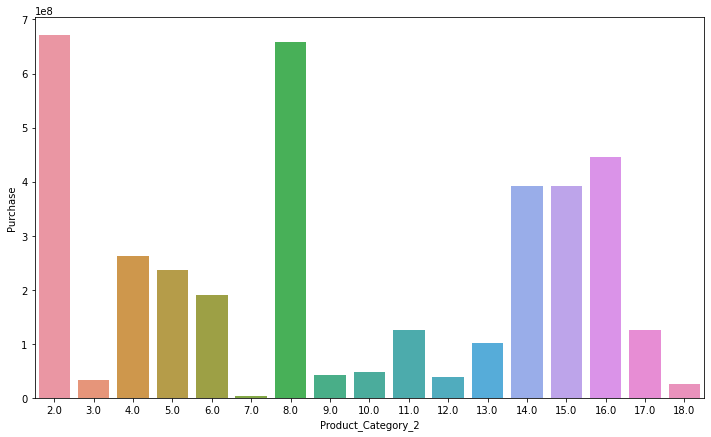

In [41]:
plt.figure(figsize = (12,7))
sns.barplot(x= Product_Category2_group.index,y=Product_Category2_group['Purchase'], data= df3)


### PRODUCT_CATEGORY_3 and PURCHASE

In [44]:
Product_Category3_group = df3.groupby("Product_Category_3")["Purchase"].sum()
Product_Category3_group = pd.DataFrame(Product_Category3_group)

Product_Category3_group

,Purchase
Product_Category_3,
3.0,8545034
4.0,18364475
5.0,201858094
6.0,64520181
8.0,163619031
9.0,120788622
10.0,23311034
11.0,21825045
12.0,80583631


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

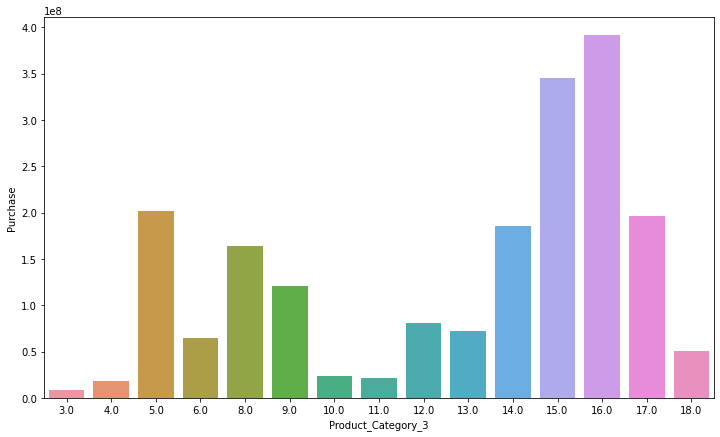

In [45]:
plt.figure(figsize = (12,7))
sns.barplot(x= Product_Category3_group.index,y=Product_Category3_group['Purchase'], data= df3)


## Multivariate Analysis

### City_Category, Product_Category_1, Product_Category_2, Product_Category_3

In [ ]:
df3.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="green")
plt.xticks(rotation=45)

In [ ]:
df3.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="City&Product")

### Correlation Table and HeatMap

<AxesSubplot:>

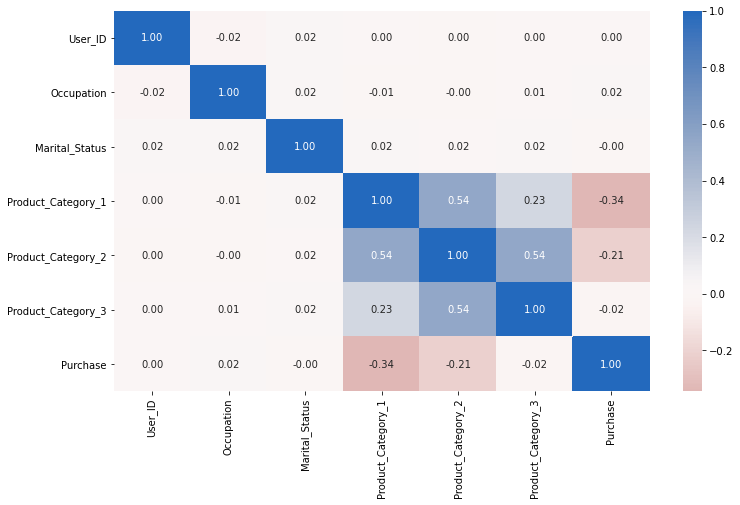

In [37]:
plt.figure(figsize = (12,7))


sns.heatmap(df3.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

# 2. Missing values Identification and Treatment 

In [ ]:
df3.isnull().sum()

In [ ]:
#Visualising the null values

sns.heatmap( df3.isnull(), cbar=False, yticklabels= False, cmap ='viridis')

The Product_Category_2 and Product_Category_3 have missing values which needs to be handled.

Replacing the NULL values in Product_Category_2 and Product_Category_3 by 0.

In [ ]:
df3 = df3.fillna(value=0,axis =1)

In [ ]:
df3.isnull().sum()

In [ ]:
sns.heatmap( df3.isnull(), cbar=False, yticklabels= False, cmap ='viridis')

In [ ]:
df3.head()

In [ ]:
# Dropping User_ID and Product_ID as they don't impact the purchase.

In [ ]:
#df3.drop(['User_ID','Product_ID'], axis=1, inplace=True)
#df3.info()

In [ ]:
#df3.head()

The Age and Stay_In_Current_City_Years columns have special characters like '+' which has to be removed.

In [ ]:
print(df_concat['Age'].unique())

In [ ]:
df3['Age']=(df3['Age'].str.strip('+'))

In [ ]:
df3['Age'].unique()

In [ ]:
df3['Stay_In_Current_City_Years']=(df3['Stay_In_Current_City_Years'].str.strip('+'))

In [ ]:
df3['Stay_In_Current_City_Years']

# 3. Outlier Analysis and Treatment 

## Outlier Identification

### Box Plot 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

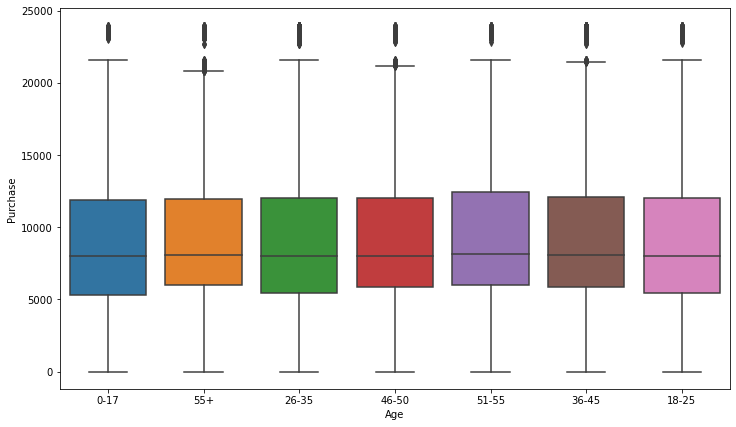

In [46]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Age', y='Purchase', data= df3)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

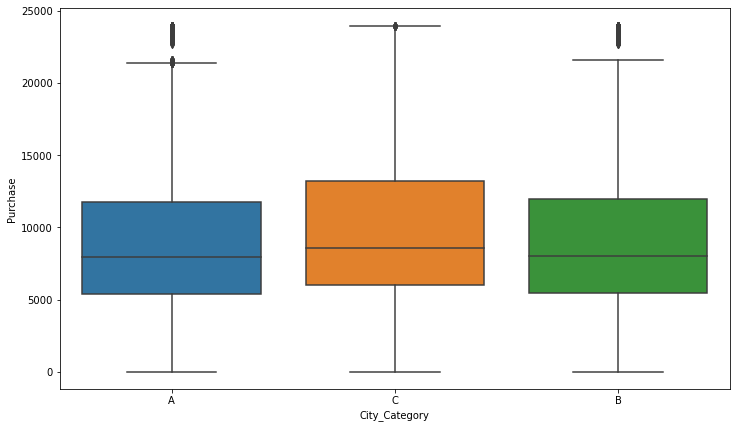

In [47]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'City_Category', y='Purchase', data= df3)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

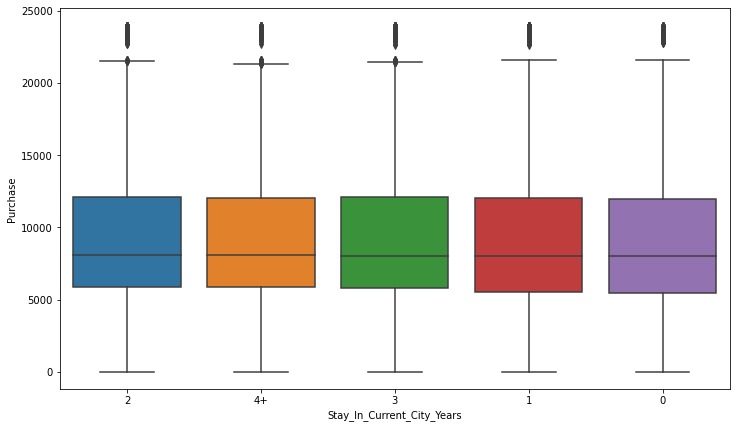

In [48]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Stay_In_Current_City_Years', y='Purchase', data= df3)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

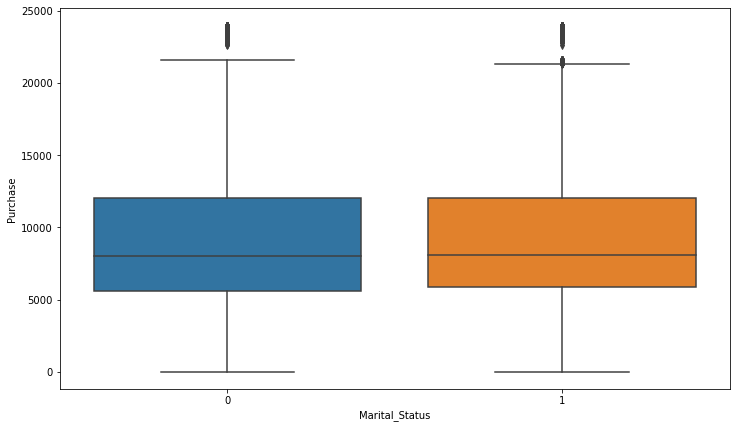

In [49]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Marital_Status', y='Purchase', data= df3)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

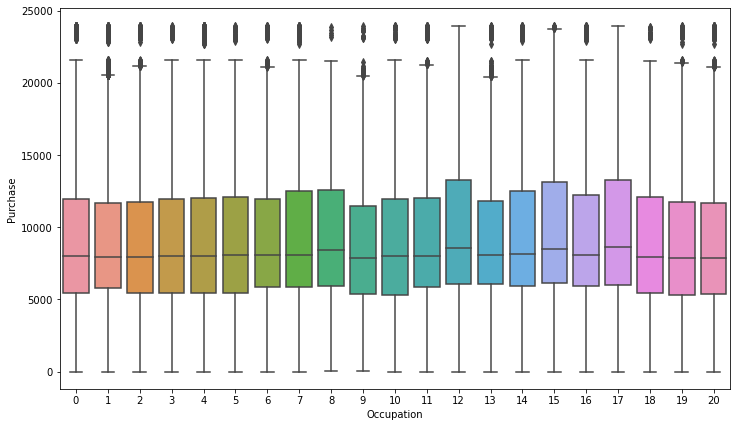

In [50]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Occupation', y='Purchase', data= df3)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

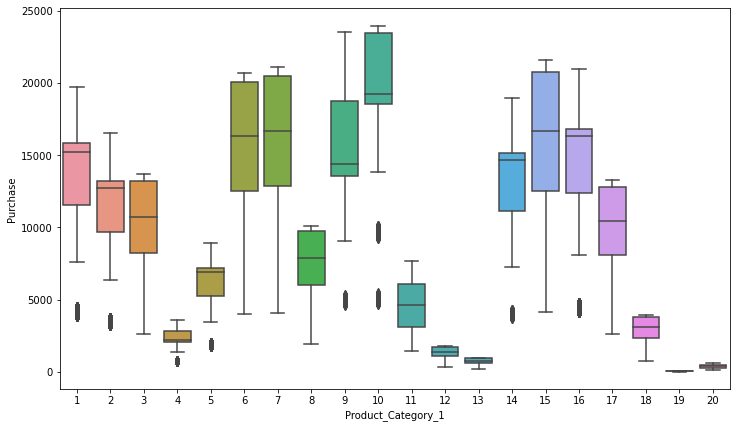

In [51]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Product_Category_1', y='Purchase', data= df3)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

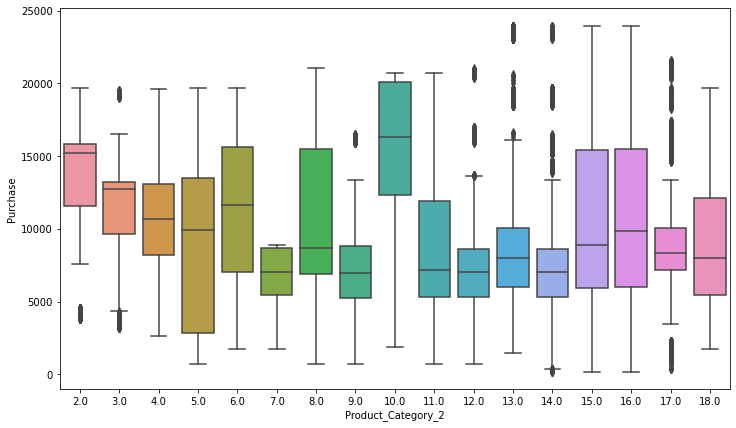

In [52]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Product_Category_2', y='Purchase', data= df3)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

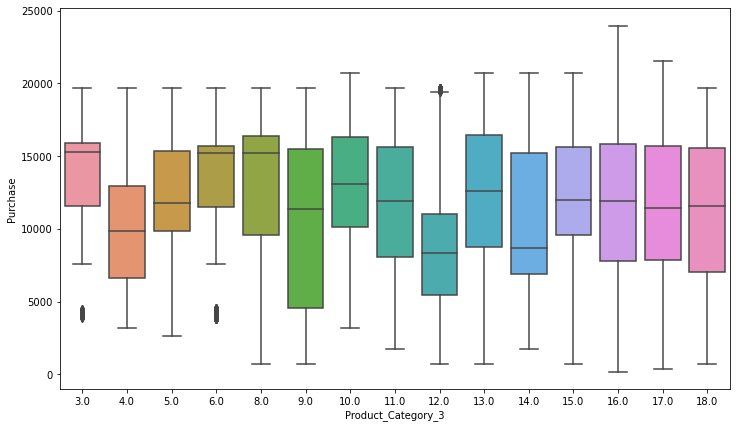

In [53]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Product_Category_3', y='Purchase', data= df3)

C:\Users\apoojha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

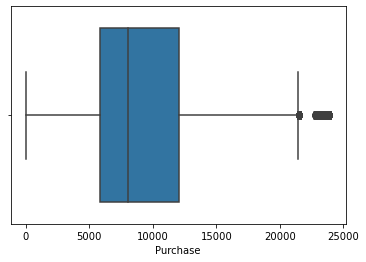

In [55]:
sns.boxplot(df3['Purchase'])


### OBSERVATION:

As we can observe from the above graph that the purchase made above 20000 are outliers
Hence we have to handle them.

In [59]:
from scipy import stats
z = np.abs(stats.zscore(df3['Purchase']))
z

array([0.1779729 , 1.1817558 , 1.56119326, ..., 0.52339229, 0.47322367,
       1.74633934])

In [60]:
np.where(z> 2.33)

newdf = df3[(z<2.33)]
newdf

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000001,F,0-17,10,P00085942,A,2,0,2,4.0,8.0,12842
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1001529,M,18-25,4,P00053942,C,4+,1,1,2.0,5.0,15185
550064,1001529,M,18-25,4,P00182742,C,4+,1,1,2.0,14.0,11975
550065,1001529,M,18-25,4,P00242742,C,4+,1,1,2.0,9.0,11893
550066,1001529,M,18-25,4,P00063342,C,4+,1,1,2.0,9.0,11641


C:\Users\apoojha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

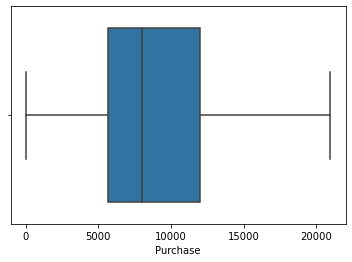

In [61]:
sns.boxplot(newdf['Purchase'])


### Scatter Plot 